In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from datetime import datetime

C:\Users\USER\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\USER\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\USER\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
start_time = time.time()  # Record the starting time

In [3]:
# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/SparrowChang/CS6375_assignment1/main/auto%2Bmpg/auto-mpg.data'  # Replace with the actual path to the dataset

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(url, delimiter='\s+', header=None)

# Create a mapping dictionary for column name changes
column_mapping = {0: 'mpg', 
                  1: 'cylinders', 
                  2: 'displacement',
                  3: 'horsepower',
                  4: 'weight',
                  5: 'acceleration',
                  6: 'model year',
                  7: 'origin',
                  8: 'car name'}
# Rename the columns using the mapping dictionary
df = df.rename(columns=column_mapping)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# Step 2: Pre-processing
# Convert categorical variables to numerical variables (if applicable)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# Drop the columns that are not relevant for the regression analysis
del df['car name']
print(df.dtypes)
print(df.shape)

# Create a StandardScaler object
scaler = StandardScaler()
normalized_df = df.copy()
normalized_df.iloc[:, 1:] = scaler.fit_transform(normalized_df.iloc[:, 1:])
# Remove null or NA values
normalized_df = normalized_df.dropna()
# Remove redundant rows
normalized_df = normalized_df.drop_duplicates()

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object
(398, 8)


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


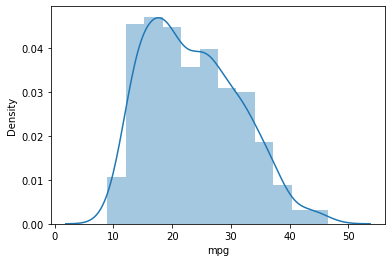

In [5]:
sns.distplot(normalized_df['mpg'])

<function matplotlib.pyplot.show(*args, **kw)>

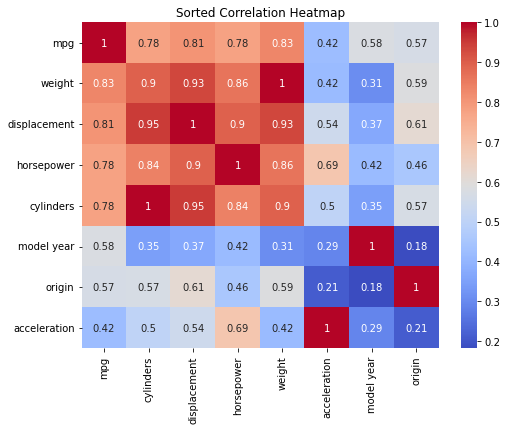

In [6]:
# Step 2: Pre-processing about abs() correlation matrix
# Calculate the correlation matrix
corr_matrix = normalized_df.corr()

# Take the absolute values of the correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Sort the correlation matrix by a specific column
sort_column = 'mpg'
sorted_abs_corr_matrix = abs_corr_matrix.sort_values(by=sort_column, ascending=False)

# Create a correlation heatmap for the sorted matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sorted_abs_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sorted Correlation Heatmap')
plt.show

In [7]:
# Step 3: Split the dataset into training and test sets
X = normalized_df.iloc[:, 1:]
X = np.column_stack((np.ones(len(X)), X))
y = normalized_df.iloc[:, 0]
y = y.values.reshape((len(y), 1))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: To define Activation Functions
# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Step 5: To define Neural Network Class
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1

        # Apply activation function to the hidden layer
        if self.activation == 'sigmoid':
            self.a1 = sigmoid(self.z1)
        elif self.activation == 'tanh':
            self.a1 = tanh(self.z1)
        elif self.activation == 'relu':
            self.a1 = relu(self.z1)

        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.z2  # Since it's a regression problem, no activation on output

        return self.output

    def backward(self, X, y, output):
        # Compute the loss and the derivative of the loss with respect to output
        loss = np.mean((output - y)**2)
        d_loss_output = 2 * (output - y) / X.shape[0]

        # Backpropagate the error
        if self.activation == 'sigmoid':
            d_output_z2 = sigmoid_derivative(output)
        elif self.activation == 'tanh':
            d_output_z2 = tanh_derivative(output)
        elif self.activation == 'relu':
            d_output_z2 = relu_derivative(output)

        d_loss_z2 = d_loss_output * d_output_z2
        d_loss_a1 = np.dot(d_loss_z2, self.W2.T)
        d_loss_z1 = d_loss_a1 * sigmoid_derivative(self.a1)  # Use sigmoid derivative for sigmoid activation

        # Compute the gradients
        d_loss_W2 = np.dot(self.a1.T, d_loss_z2)
        d_loss_b2 = np.sum(d_loss_z2, axis=0, keepdims=True)
        d_loss_W1 = np.dot(X.T, d_loss_z1)
        d_loss_b1 = np.sum(d_loss_z1, axis=0, keepdims=True)

        return loss, d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2

    def update_weights(self, d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2, learning_rate):
        # Update weights and biases using gradient descent
        self.W1 -= learning_rate * d_loss_W1
        self.b1 -= learning_rate * d_loss_b1
        self.W2 -= learning_rate * d_loss_W2
        self.b2 -= learning_rate * d_loss_b2

    def train(self, X, y, learning_rate, num_epochs, tolerance):
        for epoch in range(num_epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            loss, d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2 = self.backward(X, y, output)

            # Update weights and biases
            self.update_weights(d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.2f}')
            
            # check if the loss is below the tolerance level
            if loss < tolerance:
                print('Traning converaged!')
                break 
                
        print('Training completed!')

    def predict(self, X):
        output = self.forward(X)
        return output

In [9]:
# Step 6: To set up Neural Network model
# Create an instance of the NeuralNetwork class
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
tolerance = 0.001

iteration_range = [100, 500, 1000]
learning_rate_range = [0.001, 0.01, 0.1, 0.5]
activ = ['sigmoid', 'tanh', 'relu']

In [10]:
# activ[0]
best_error = float('inf')
best_params = {}
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Step 7: train and evaluate test result
log_file_path = 'path_to_log_file.txt'  # Replace with the actual path to the log file
with open(log_file_path, 'w') as log_file:
    for learning_rate in learning_rate_range:
        for num_epochs in iteration_range:
            # Create an instance of the NeuralNetwork class
            print(activ[0])
            log_file.write(f'{activ[0]} ')
            model = NeuralNetwork(input_size, hidden_size, output_size, activation=activ[0])
            
            # Train the model
            model.train(X_train, y_train, learning_rate, num_epochs, tolerance)
            
            # Evaluate the model
            train_predictions = model.predict(X_train).flatten()
            train_loss = np.mean((train_predictions - y_train.flatten())**2)
            train_accuracy = np.mean(np.abs(train_predictions - y_train.flatten()))
            
            test_predictions = model.predict(X_test).flatten()
            test_loss = np.mean((test_predictions - y_test.flatten())**2)
            test_accuracy = np.mean(np.abs(test_predictions - y_test.flatten()))
            
            print(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
            print(f'-----------------')

            # Write the results to the log file
            log_file.write(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}\n')
            log_file.write(f'-----------------\n')
            
            # Check if current parameters yield the best error
            if test_loss < best_error:
                best_error = test_loss
                best_params = {'learning_rate': learning_rate, 'num_epochs': num_epochs}
            
            # Save loss and accuracy values for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)
            
    print("Best Mean squared error (MSE): {:.2f}".format(best_error))
    print("Best parameters:", best_params)
    
    # Write the best error and best parameters to the log file
    log_file.write(f'Best Mean squared error (MSE):{best_error:.2f}\n')
    log_file.write(f'Best parameters:{best_params}\n')
    log_file.write(f'------------------------------------------------------------------------------------\n')
    log_file.write(f'\n')

sigmoid
Epoch 100/100, Loss: 434.15
Training completed!
Learning Rate: 0.001, Num Epochs: 100, Train Loss: 433.08, Train Accuracy: 19.11, Test Loss: 413.88, Test Accuracy: 18.88
-----------------
sigmoid
Epoch 100/500, Loss: 390.73
Epoch 200/500, Loss: 372.89
Epoch 300/500, Loss: 361.77
Epoch 400/500, Loss: 353.71
Epoch 500/500, Loss: 347.41
Training completed!
Learning Rate: 0.001, Num Epochs: 500, Train Loss: 347.36, Train Accuracy: 16.72, Test Loss: 299.86, Test Accuracy: 15.70
-----------------
sigmoid
Epoch 100/1000, Loss: 385.67
Epoch 200/1000, Loss: 329.94
Epoch 300/1000, Loss: 282.25
Epoch 400/1000, Loss: 269.34
Epoch 500/1000, Loss: 264.18
Epoch 600/1000, Loss: 261.12
Epoch 700/1000, Loss: 258.97
Epoch 800/1000, Loss: 257.32
Epoch 900/1000, Loss: 255.97
Epoch 1000/1000, Loss: 254.83
Training completed!
Learning Rate: 0.001, Num Epochs: 1000, Train Loss: 254.82, Train Accuracy: 14.28, Test Loss: 231.58, Test Accuracy: 13.85
-----------------
sigmoid
Epoch 100/100, Loss: 325.87


best_train_MSE
[258.27624922221764, 76.2025747375033, 187.66453640716497]
best_test_MSE
[229.88498333512342, 58.6153786243903, 153.51723026676973]


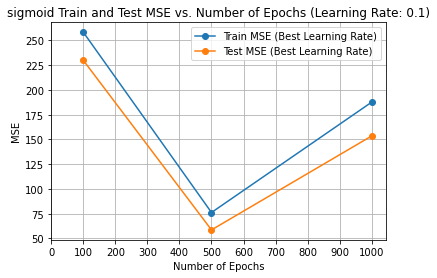

In [11]:
# Extract the best learning rate
best_learning_rate = best_params['learning_rate']

# Find the index of the best learning rate in the learning_rate_range list
learning_rate_index = learning_rate_range.index(best_learning_rate)
start_index = learning_rate_index*len(iteration_range)

# Extract the train and test losses for the best learning rate at different number of epochs
# best_train_losses = train_losses[learning_rate_index::len(learning_rate_range)]
best_train_losses = train_losses[start_index:(start_index+3)]
print('best_train_MSE')
print(best_train_losses)
best_test_losses = test_losses[start_index:(start_index+3)]
print('best_test_MSE')
print(best_test_losses)

# Plotting the train and test losses for the best learning rate
plt.plot(iteration_range, best_train_losses, 'o-', label='Train MSE (Best Learning Rate)')
plt.plot(iteration_range, best_test_losses, 'o-', label='Test MSE (Best Learning Rate)')

plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title(activ[0]+f' Train and Test MSE vs. Number of Epochs (Learning Rate: {best_learning_rate})')
plt.legend()
plt.grid(True)

# Set grid lines on the x-axis for every 100 units
plt.xticks(range(0, iteration_range[-1]+1, 100))

# Save the image
plt.savefig(activ[0] + '.png', dpi=150, bbox_inches='tight')

plt.show()

In [12]:
# activ[1]
best_error = float('inf')
best_params = {}
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

log_file_path = 'path_to_log_file.txt'  # Replace with the actual path to the log file
with open(log_file_path, 'a') as log_file:
    for learning_rate in learning_rate_range:
        for num_epochs in iteration_range:
            # Create an instance of the NeuralNetwork class
            print(activ[1])
            log_file.write(f'{activ[1]} ')
            model = NeuralNetwork(input_size, hidden_size, output_size, activation=activ[1])
            
            # Train the model
            model.train(X_train, y_train, learning_rate, num_epochs, tolerance)
            
            # Evaluate the model
            train_predictions = model.predict(X_train).flatten()
            train_loss = np.mean((train_predictions - y_train.flatten())**2)
            train_accuracy = np.mean(np.abs(train_predictions - y_train.flatten()))
            
            test_predictions = model.predict(X_test).flatten()
            test_loss = np.mean((test_predictions - y_test.flatten())**2)
            test_accuracy = np.mean(np.abs(test_predictions - y_test.flatten()))
            
            print(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
            print(f'-----------------')

            # Write the results to the log file
            log_file.write(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}\n')
            log_file.write(f'-----------------\n')
            
            # Check if current parameters yield the best error
            if test_loss < best_error:
                best_error = test_loss
                best_params = {'learning_rate': learning_rate, 'num_epochs': num_epochs}
            
            # Save loss and accuracy values for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)
            
    print("Best Mean squared error (MSE): {:.2f}".format(best_error))
    print("Best parameters:", best_params)
    
    # Write the best error and best parameters to the log file
    log_file.write(f'Best Mean squared error (MSE):{best_error:.2f}\n')
    log_file.write(f'Best parameters:{best_params}\n')
    log_file.write(f'------------------------------------------------------------------------------------\n')
    log_file.write(f'\n')

tanh
Epoch 100/100, Loss: 231.60
Training completed!
Learning Rate: 0.001, Num Epochs: 100, Train Loss: 231.46, Train Accuracy: 12.65, Test Loss: 209.87, Test Accuracy: 12.30
-----------------
tanh
Epoch 100/500, Loss: 369.90
Epoch 200/500, Loss: 329.10
Epoch 300/500, Loss: 316.77
Epoch 400/500, Loss: 302.10
Epoch 500/500, Loss: 287.81
Training completed!
Learning Rate: 0.001, Num Epochs: 500, Train Loss: 287.76, Train Accuracy: 15.06, Test Loss: 260.48, Test Accuracy: 14.69
-----------------
tanh
Epoch 100/1000, Loss: 324.78
Epoch 200/1000, Loss: 305.85
Epoch 300/1000, Loss: 292.47
Epoch 400/1000, Loss: 283.11
Epoch 500/1000, Loss: 278.97
Epoch 600/1000, Loss: 276.14
Epoch 700/1000, Loss: 273.93
Epoch 800/1000, Loss: 272.11
Epoch 900/1000, Loss: 270.54
Epoch 1000/1000, Loss: 269.17
Training completed!
Learning Rate: 0.001, Num Epochs: 1000, Train Loss: 269.16, Train Accuracy: 14.09, Test Loss: 243.44, Test Accuracy: 13.61
-----------------
tanh
Epoch 100/100, Loss: 254.12
Training com

best_train_MSE
[153.14225652571923, 135.05127100796437, 219.07235535941427]
best_test_MSE
[135.1646056469404, 101.75241666926293, 190.88924202755675]


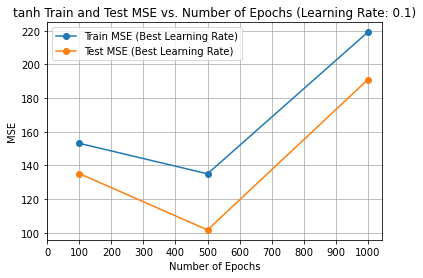

In [13]:
# Extract the best learning rate
best_learning_rate = best_params['learning_rate']

# Find the index of the best learning rate in the learning_rate_range list
learning_rate_index = learning_rate_range.index(best_learning_rate)
start_index = learning_rate_index*len(iteration_range)

# Extract the train and test losses for the best learning rate at different number of epochs
# best_train_losses = train_losses[learning_rate_index::len(learning_rate_range)]
best_train_losses = train_losses[start_index:(start_index+3)]
print('best_train_MSE')
print(best_train_losses)
best_test_losses = test_losses[start_index:(start_index+3)]
print('best_test_MSE')
print(best_test_losses)

# Plotting the train and test losses for the best learning rate
plt.plot(iteration_range, best_train_losses, 'o-', label='Train MSE (Best Learning Rate)')
plt.plot(iteration_range, best_test_losses, 'o-', label='Test MSE (Best Learning Rate)')

plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title(activ[1]+f' Train and Test MSE vs. Number of Epochs (Learning Rate: {best_learning_rate})')
plt.legend()
plt.grid(True)

# Set grid lines on the x-axis for every 100 units
plt.xticks(range(0, iteration_range[-1]+1, 100))

# Save the image
plt.savefig(activ[1] + '.png', dpi=150, bbox_inches='tight')

plt.show()

In [14]:
# activ[2]
best_error = float('inf')
best_params = {}
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

log_file_path = 'path_to_log_file.txt'  # Replace with the actual path to the log file
with open(log_file_path, 'a') as log_file:
    for learning_rate in learning_rate_range:
        for num_epochs in iteration_range:
            # Create an instance of the NeuralNetwork class
            print(activ[2])
            log_file.write(f'{activ[2]} ')
            model = NeuralNetwork(input_size, hidden_size, output_size, activation=activ[2])
            
            # Train the model
            model.train(X_train, y_train, learning_rate, num_epochs, tolerance)
            
            # Evaluate the model
            train_predictions = model.predict(X_train).flatten()
            train_loss = np.mean((train_predictions - y_train.flatten())**2)
            train_accuracy = np.mean(np.abs(train_predictions - y_train.flatten()))
            
            test_predictions = model.predict(X_test).flatten()
            test_loss = np.mean((test_predictions - y_test.flatten())**2)
            test_accuracy = np.mean(np.abs(test_predictions - y_test.flatten()))
            
            print(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
            print(f'-----------------')

            # Write the results to the log file
            log_file.write(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}\n')
            log_file.write(f'-----------------\n')
            
            # Check if current parameters yield the best error
            if test_loss < best_error:
                best_error = test_loss
                best_params = {'learning_rate': learning_rate, 'num_epochs': num_epochs}
            
            # Save loss and accuracy values for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)
            
    print("Best Mean squared error (MSE): {:.2f}".format(best_error))
    print("Best parameters:", best_params)
    
    # Write the best error and best parameters to the log file
    log_file.write(f'Best Mean squared error (MSE):{best_error:.2f}\n')
    log_file.write(f'Best parameters:{best_params}\n')
    log_file.write(f'------------------------------------------------------------------------------------\n')
    log_file.write(f'\n')

relu
Epoch 100/100, Loss: 1594.73
Training completed!
Learning Rate: 0.001, Num Epochs: 100, Train Loss: 1566.87, Train Accuracy: 34.75, Test Loss: 1618.12, Test Accuracy: 35.82
-----------------
relu
Epoch 100/500, Loss: 21.73
Epoch 200/500, Loss: 14.92
Epoch 300/500, Loss: 12.80
Epoch 400/500, Loss: 12.00
Epoch 500/500, Loss: 11.60
Training completed!
Learning Rate: 0.001, Num Epochs: 500, Train Loss: 11.60, Train Accuracy: 2.53, Test Loss: 7.62, Test Accuracy: 2.09
-----------------
relu
Epoch 100/1000, Loss: 19.91
Epoch 200/1000, Loss: 15.00
Epoch 300/1000, Loss: 13.07
Epoch 400/1000, Loss: 11.96
Epoch 500/1000, Loss: 11.24
Epoch 600/1000, Loss: 10.72
Epoch 700/1000, Loss: 10.34
Epoch 800/1000, Loss: 10.04
Epoch 900/1000, Loss: 9.80
Epoch 1000/1000, Loss: 9.60
Training completed!
Learning Rate: 0.001, Num Epochs: 1000, Train Loss: 9.60, Train Accuracy: 2.35, Test Loss: 8.87, Test Accuracy: 2.32
-----------------
relu
Epoch 100/100, Loss: 10.82
Training completed!
Learning Rate: 0.0

best_train_MSE
[1566.8744396612567, 11.60030105861373, 9.602244852306102]
best_test_MSE
[1618.1221336994256, 7.615869646584563, 8.870402598743317]


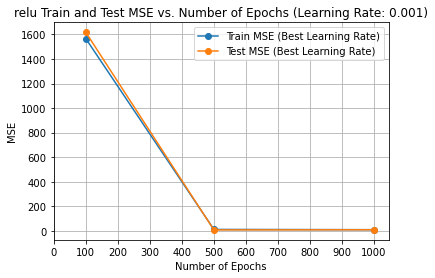

In [15]:
# Extract the best learning rate
best_learning_rate = best_params['learning_rate']

# Find the index of the best learning rate in the learning_rate_range list
learning_rate_index = learning_rate_range.index(best_learning_rate)
start_index = learning_rate_index*len(iteration_range)

# Extract the train and test losses for the best learning rate at different number of epochs
# best_train_losses = train_losses[learning_rate_index::len(learning_rate_range)]
best_train_losses = train_losses[start_index:(start_index+3)]
print('best_train_MSE')
print(best_train_losses)
best_test_losses = test_losses[start_index:(start_index+3)]
print('best_test_MSE')
print(best_test_losses)

# Plotting the train and test losses for the best learning rate
plt.plot(iteration_range, best_train_losses, 'o-', label='Train MSE (Best Learning Rate)')
plt.plot(iteration_range, best_test_losses, 'o-', label='Test MSE (Best Learning Rate)')

plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title(activ[2]+f' Train and Test MSE vs. Number of Epochs (Learning Rate: {best_learning_rate})')
plt.legend()
plt.grid(True)

# Set grid lines on the x-axis for every 100 units
plt.xticks(range(0, iteration_range[-1]+1, 100))

# Save the image
plt.savefig(activ[2] + '.png', dpi=150, bbox_inches='tight')

plt.show()

In [16]:
end_time = time.time()  # Record the ending time

execution_time = end_time - start_time

# Get the current date and time
current_datetime = datetime.now()

print("Execution time: {:.2f} seconds".format(execution_time))
print("Current date and time:", current_datetime)
with open(log_file_path, 'a') as log_file:
    log_file.write(f'Execution time: {execution_time:.2f} seconds\n')
    log_file.write(f'Current date and time: {current_datetime}')

Execution time: 24.97 seconds
Current date and time: 2023-07-03 17:07:40.041273
